# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Konfigurasi warning
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [14]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
df.head()

Jumlah Baris: 7043
Jumlah Kolom: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

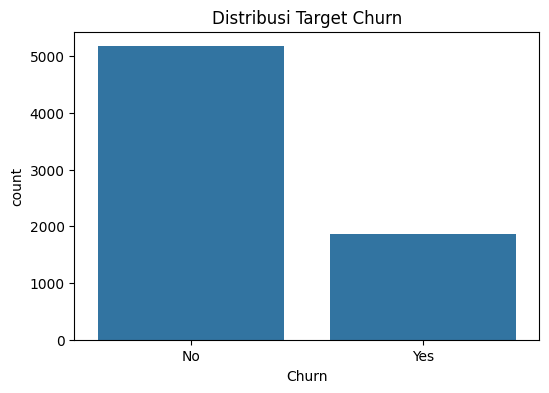


--- Jumlah baris dengan TotalCharges kosong (spasi) ---
11


In [15]:
# Cek Info Tipe Data
print("--- Info Dataset ---")
df.info()

# Cek Missing Values
print("\n--- Cek Nilai Kosong Awal ---")
print(df.isnull().sum())

# Analisis Target (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Target Churn')
plt.show()

# Deteksi Anomali pada TotalCharges
print("\n--- Jumlah baris dengan TotalCharges kosong (spasi) ---")
is_empty = df['TotalCharges'] == " "
print(is_empty.sum())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# Copy dataset agar data asli aman
df_clean = df.copy()

# Handling Missing Values / Dirty Data
# Mengubah spasi kosong di TotalCharges menjadi NaN lalu di-drop atau diisi 0
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'].fillna(0, inplace=True)

# Hapus kolom customerID karena tidak berguna untuk ML
if 'customerID' in df_clean.columns:
    df_clean.drop('customerID', axis=1, inplace=True)

# Encoding Kategorikal
# Label Encoding untuk kolom biner dan Target
le = LabelEncoder()
cols_to_encode = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'Gender']

# Perbaikan: Loop cek kolom biner
binary_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object' and df_clean[col].nunique() == 2]
for col in binary_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# One-Hot Encoding untuk kolom dengan >2 kategori
df_clean = pd.get_dummies(df_clean, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                             'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                             'StreamingTV', 'StreamingMovies', 'Contract',
                                             'PaymentMethod'])

# Scaling (Standarisasi)
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

print("Dimensi Data setelah Preprocessing:", df_clean.shape)
df_clean.head()

# Simpan hasil eksperimen
df_clean.to_csv('clean_telco_churn.csv', index=False)

Dimensi Data setelah Preprocessing: (7043, 41)
